## Ngưỡng ảnh

Thresholding là kỹ thuật giúp bạn chuyển ảnh từ ảnh xám (grayscale) sang ảnh nhị phân (chỉ có trắng và đen – 0 và 255). Điều này giúp phân vùng ảnh, tạo mặt nạ hoặc tách đối tượng ra khỏi nền.

### Ngưỡng đơn giản
#### Cú pháp hàm

``` python
retval, dst = cv2.threshold( src, thresh, maxval, type[, dst] )
```

`dst`: Mảng đầu ra có cùng kích thước và kiểu và cùng số kênh với `src`.  
`retval`: Giá trị ngưỡng đã được dùng

Hàm có **4 đối số bắt buộc**:

1. `src`: mảng đầu vào (nhiều kênh, số thực 8 bit hoặc 32 bit).

2. `thresh`: giá trị ngưỡng.

3. `maxval`: giá trị tối đa để sử dụng với các loại ngưỡng THRESH_BINARY và THRESH_BINARY_INV.

4. `type`: loại ngưỡng (xem ThresholdTypes).

### Ngưỡng thích ứng
Khi ảnh không đều sáng (độ sáng thay đổi theo vùng), ngưỡng cố định không hiệu quả. Ta cần dùng Adaptive Threshold để tính ngưỡng khác nhau cho từng vùng nhỏ của ảnh.
#### Cú pháp hàm

``` python
dst = cv.adaptiveThreshold( src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst] )
```

`dst` Ảnh đích có cùng kích thước và cùng loại với src.

Hàm có **6 đối số bắt buộc**:
1. `src`: Ảnh kênh đơn 8 bit nguồn.

2. `maxValue`: Giá trị khác không được gán cho các pixel mà điều kiện được đáp ứng

3. `adaptiveMethod`: Thuật toán ngưỡng thích ứng để sử dụng, xem AdaptiveThresholdTypes. BORDER_REPLICATE | BORDER_ISOLATED được sử dụng để xử lý ranh giới.

4. `thresholdType:` Kiểu ngưỡng phải là THRESH_BINARY hoặc THRESH_BINARY_INV, hãy xem ThresholdTypes.

5. `blockSize`: Kích thước của vùng lân cận pixel được sử dụng để tính giá trị ngưỡng cho pixel: 3, 5, 7, v.v.

6. `C`: Hằng số trừ khỏi giá trị trung bình hoặc giá trị trung bình có trọng số (xem chi tiết bên dưới). Thông thường, giá trị này là số dương nhưng cũng có thể là số không hoặc số âm.

### Tài liệu OpenCV

<a href="https://docs.opencv.org/4.5.1/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57
https://docs.opencv.org/4.5.1/d7/d4d/tutorial_py_thresholding.html" target="_blank">Liên kết tài liệu</a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

%matplotlib inline

100.0
(572, 800)


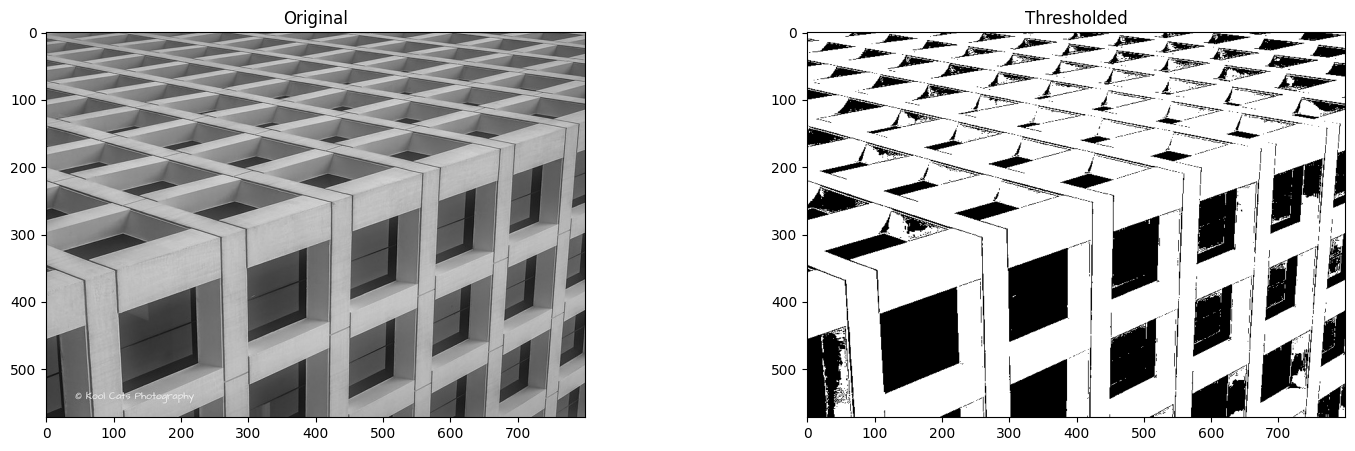

In [2]:
img_read = cv2.imread("images/building-windows.jpg", cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)

# Hiển thị ảnh
plt.figure(figsize=[18, 5])

plt.subplot(121); plt.imshow(img_read, cmap="gray");   plt.title("Original")
plt.subplot(122); plt.imshow(img_thresh, cmap="gray"); plt.title("Thresholded")

print(retval)
print(img_thresh.shape)

Text(0.5, 1.0, 'cv2')

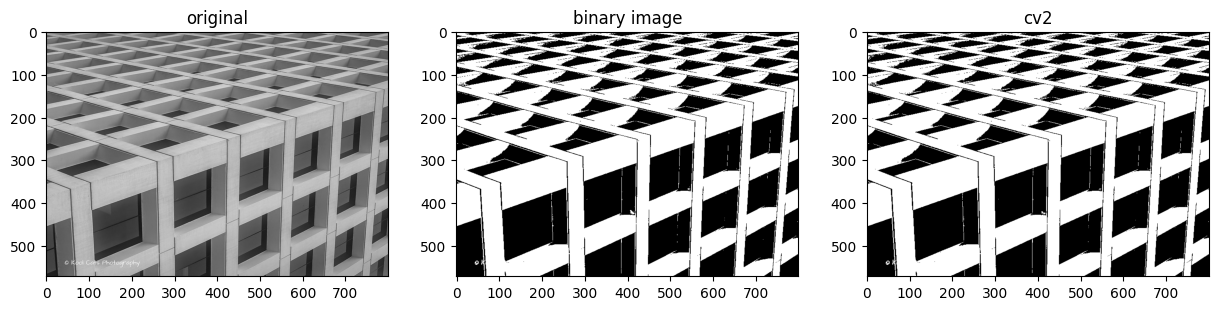

In [3]:
img = img_read
img_binary = np.zeros(img.shape)
retval,dst = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j] < 127:
            img_binary[i][j] = 0
        else:
            img_binary[i][j] = 255

plt.figure(figsize=[15,5])
plt.subplot(131); plt.imshow(img, cmap="gray");        plt.title("original")
plt.subplot(132); plt.imshow(img_binary, cmap="gray"); plt.title("binary image")
plt.subplot(133); plt.imshow(dst, cmap="gray");        plt.title("cv2")   

## Mimi Project: Trình đọc bản nhạc


Giả sử bạn muốn xây dựng một ứng dụng có thể đọc (giải mã) bản nhạc. Điều này tương tự như
Nhận dạng ký tự quang học (OCR) cho các tài liệu văn bản, trong đó mục tiêu là nhận dạng các ký tự văn bản. Trong cả hai ứng dụng, một trong những bước đầu tiên trong quy trình xử lý là cô lập thông tin quan trọng trong hình ảnh của tài liệu (tách thông tin đó khỏi nền). Nhiệm vụ này có thể được thực hiện bằng các kỹ thuật ngưỡng. Chúng ta hãy xem một ví dụ.

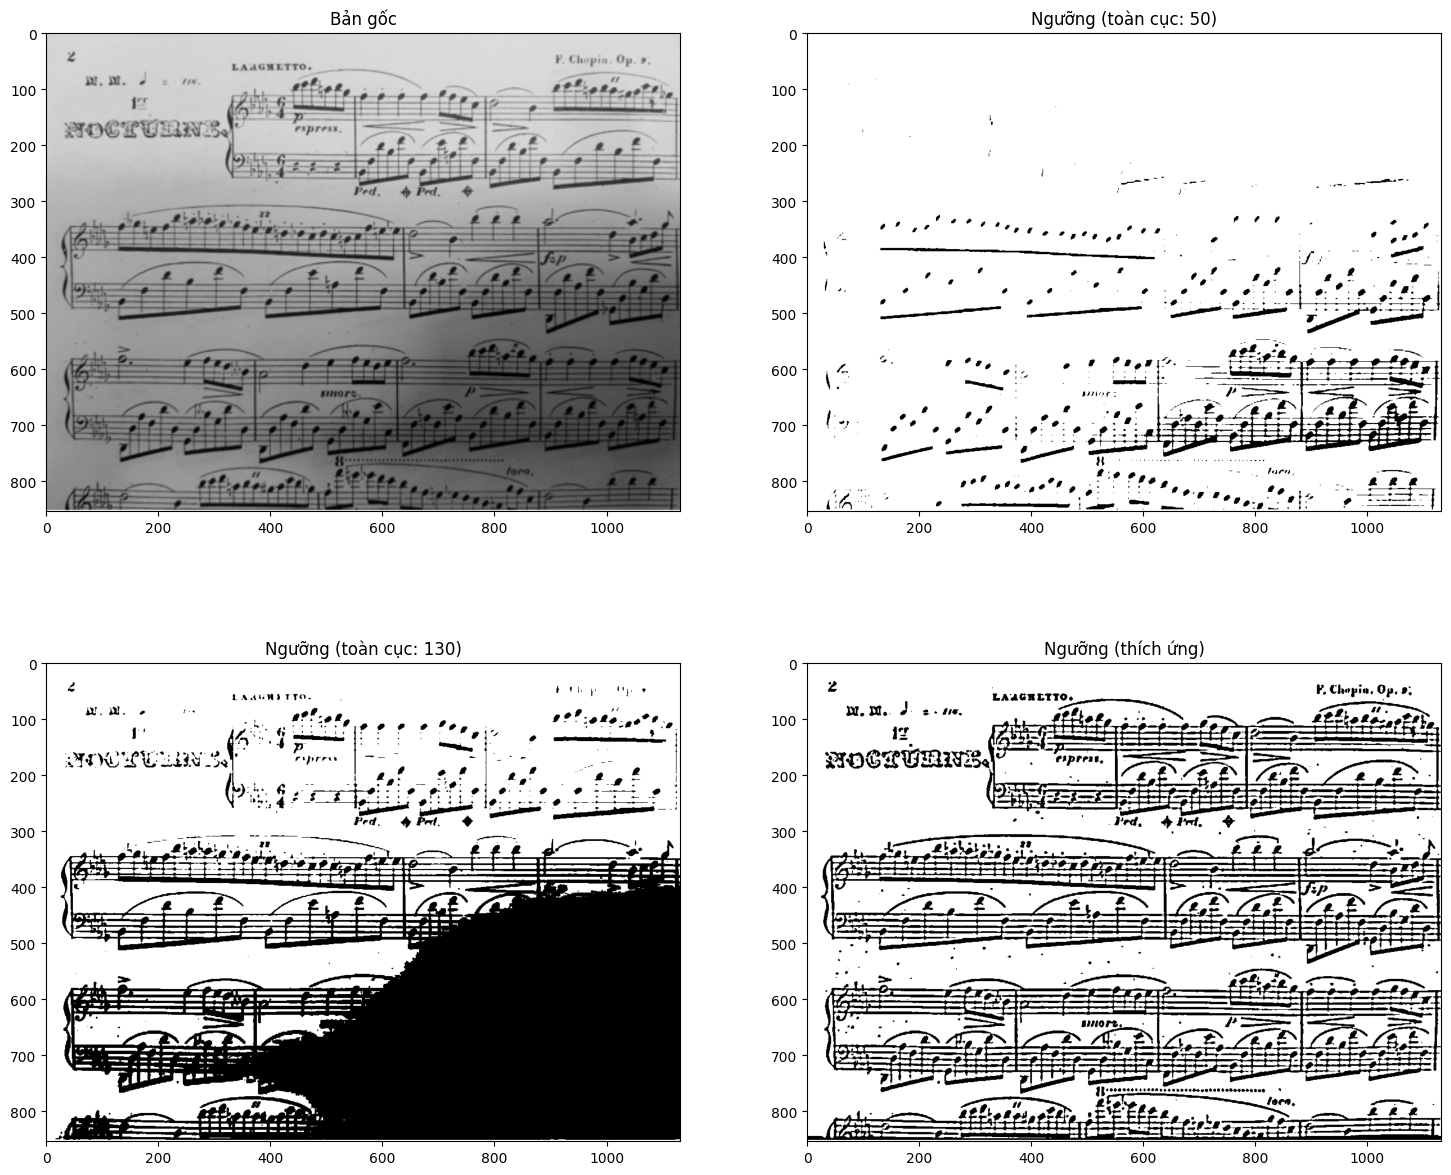

In [4]:
# Đọc hình ảnh gốc
img_read = cv2.imread("images/Piano_Sheet_Music.png", cv2.IMREAD_GRAYSCALE)

# Thực hiện ngưỡng toàn cục
retval, img_thresh_gbl_1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)

# Thực hiện ngưỡng toàn cục
retval, img_thresh_gbl_2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)

# Thực hiện ngưỡng thích ứng
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 5)

# Hiển thị hình ảnh
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read, cmap="gray"); plt.title("Bản gốc");
plt.subplot(222); plt.imshow(img_thresh_gbl_1, cmap="gray"); plt.title("Ngưỡng (toàn cục: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2, cmap="gray"); plt.title("Ngưỡng (toàn cục: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp, cmap="gray"); plt.title("Ngưỡng (thích ứng)");